In [264]:
mt5_simboli=["AUDCAD","AUDCHF","AUDJPY","AUDNZD","AUDUSD","CADCHF","CADJPY","CHFJPY","EURAUD","EURCAD","EURCHF","EURGBP","EURJPY",\
            "EURNZD","EURUSD","GBPAUD","GBPCAD","GBPCHF","GBPJPY","GBPNZD","GBPUSD","NZDCAD","NZDCHF","NZDJPY","NZDUSD","USDCAD",\
            "USDCHF","USDJPY"]

In [216]:
mt5_simboli=mt5_simboli+forex_simboli

In [262]:
def remove_outlier(y):
    Q1 = np.percentile(y, 20, #25
                       interpolation = 'midpoint')
    Q3 = np.percentile(y, 80, #75
                       interpolation = 'midpoint')
    IQR = Q3 - Q1
    y[y>=Q3+1.5*IQR]=0
    y[y<=Q1-1.5*IQR]=0
    return y

In [265]:
path=(r"C:\Program Files\ICMarkets - MetaTrader 5 1\terminal64.exe")

import pandas as pd
from tqdm.notebook import tqdm

data=pd.DataFrame()
targets=pd.DataFrame()
for e in tqdm(mt5_simboli[:-1]): #mt5_simboli[:500]):
    x=readdata(e,"H1",48000,path)
    
    #x.index = x.index.tz_localize('UTC').tz_convert('Etc/GMT-1') 
    #x.index  = x.index.tz_localize(None)
    
    #x=x[(x.index.hour>=2) & (x.index.hour<=22) ]
    
    x = x.resample("D").agg({'open': 'first','high': 'max','low':'min','close':'last','volume':'sum'})
    
    x=x.loc["2016-01-01":]
    if (len(x.dropna())>80):
        if(x.open.iloc[-1]!=np.nan):
            tg=x.close-x.open
            tg=tg*get_poin_values(path,e)
            tg=tg.to_frame()
            tg = remove_outlier(tg.dropna())
            x=x.open.to_frame()
            x.columns=([e]) 
            tg.columns=([e]) 
            data=pd.concat([data,x],axis=1)
            targets=pd.concat([targets,tg],axis=1)
data=data[(data.index.dayofweek != 5)&(data.index.dayofweek != 6)]
targets=targets[(targets.index.dayofweek != 5)&(targets.index.dayofweek != 6)]
display(data.tail())
display(targets.tail())
data_etf = targets.iloc[:-1].copy()

  0%|          | 0/27 [00:00<?, ?it/s]

,AUDCAD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,CADCHF,CADJPY,CHFJPY,EURAUD,EURCAD,...,GBPCHF,GBPJPY,GBPNZD,GBPUSD,NZDCAD,NZDCHF,NZDJPY,NZDUSD,USDCAD,USDCHF
time,,,,,,,,,,,,,,,,,,,,,
2023-04-10,0.89890,0.60088,87.872,1.06548,0.66499,0.66732,97.649,145.978,1.63474,1.47246,...,1.12279,164.077,1.98584,1.24207,0.84352,0.56407,82.454,0.62408,1.35148,0.90318
2023-04-11,0.89640,0.60252,88.604,1.06566,0.66363,0.67294,98.863,146.835,1.63570,1.46635,...,1.12558,165.417,1.98584,1.23821,0.83958,0.56476,83.072,0.62105,1.35072,0.90909
2023-04-12,0.89510,0.60070,88.838,1.07396,0.66480,0.67058,99.218,147.867,1.63942,1.46878,...,1.12169,166.032,2.00619,1.24240,0.83293,0.55880,82.686,0.61876,1.34636,0.90330
2023-04-13,0.89888,0.59900,89.035,1.07640,0.66876,0.66624,99.009,148.542,1.64084,1.47741,...,1.11823,166.195,2.00867,1.24846,0.83455,0.55608,82.626,0.62085,1.34395,0.89569
2023-04-14,0.90346,0.60305,89.868,1.07638,0.67742,0.66673,99.374,148.983,1.62760,1.47300,...,1.11339,166.009,1.98857,1.25226,0.83840,0.55939,83.285,0.62879,1.33352,0.88942


,AUDCAD,AUDCHF,AUDJPY,AUDNZD,AUDUSD,CADCHF,CADJPY,CHFJPY,EURAUD,EURCAD,...,GBPCHF,GBPJPY,GBPNZD,GBPUSD,NZDCAD,NZDCHF,NZDJPY,NZDUSD,USDCAD,USDCHF
time,,,,,,,,,,,,,,,,,,,,,
2023-04-10,-113.961660,314.510219,581.712540,130.475409,-74.996386,590.342806,845.631359,618.538422,23.272193,-361.556933,...,325.706376,920.647044,270.636766,-346.067659,-227.923320,148.603534,421.451758,-196.074888,-36.630534,633.091768
2023-04-11,-41.378936,-157.764026,234.594506,496.832125,154.510626,-212.726977,291.879211,792.438419,269.467495,199.432905,...,-334.866868,477.372542,1170.860112,392.149776,-400.222497,-560.825666,-206.634114,-167.160619,-293.722612,-597.467633
2023-04-12,308.646163,-81.426594,188.903134,174.347053,409.317623,-387.794154,-116.615292,456.231758,161.068071,584.731851,...,-290.082241,119.343135,136.742787,538.528264,160.767342,-203.566485,13.639215,243.060575,-147.878821,-711.464864
2023-04-13,401.579183,440.721440,609.672932,51.848307,864.717363,56.998616,259.145094,325.295289,-756.958692,-260.483794,...,-444.792769,-115.251371,-1130.976799,347.874801,358.843560,394.918981,568.755285,791.528119,-677.664871,-633.091768
2023-04-14,-47.484025,-120.104226,-36.825882,-87.743288,38.853549,-44.784627,35.461960,155.487056,309.887620,121.423435,...,-34.606302,55.920783,-48.999499,118.367790,130.920240,58.016448,183.447448,165.353477,-61.729233,-151.657031


In [267]:
def gross_profit(operations):
    return round(operations[operations > 0].sum(),2)
    
def gross_loss(operations):
    return round(operations[operations <= 0].sum(),2)
    
def profit_factor(operations):
    a = gross_profit(operations)
    b = gross_loss(operations)
    if b != 0:
        return round(abs(a / b), 2)
    else:
        return round(abs(a / 0.00000001), 2)
    
def kestner_ratio(operations):

    import numpy as np
    import matplotlib.pyplot as plt 
    from scipy import stats
    
    monthly_operations = operations.resample('D').sum().fillna(0)
    monthly_equity = monthly_operations.cumsum()
    index = np.array(np.arange(1,monthly_operations.count() + 1))
    
    x = index
    y = monthly_equity
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    if std_err != 0 and len(index) > 0:
        return round(gradient / (std_err * len(index)),5)
    else:
        return np.inf
    
def avg_trade(operations):
    return round(operations.mean(),2)

In [268]:
etf_return=pd.DataFrame()
for e in range(len(data_etf.columns)):
    x=data_etf.iloc[:,e].copy() #(data_etf.iloc[:,e].shift(-1)-data_etf.iloc[:,e])
    x=x.to_frame()#*100
    x.columns=([data_etf.iloc[:,e].name+"_long"])
    y=x.copy()*(-1)
    y.columns=([data_etf.iloc[:,e].name+"_short"])
    etf_return = pd.concat([etf_return,x,y],axis=1).fillna(0)

In [312]:
etf_return.tail()

,AUDCAD_long,AUDCAD_short,AUDCHF_long,AUDCHF_short,AUDJPY_long,AUDJPY_short,AUDNZD_long,AUDNZD_short,AUDUSD_long,AUDUSD_short,...,NZDCHF_long,NZDCHF_short,NZDJPY_long,NZDJPY_short,NZDUSD_long,NZDUSD_short,USDCAD_long,USDCAD_short,USDCHF_long,USDCHF_short
time,,,,,,,,,,,,,,,,,,,,,
2023-04-07,-8.140119,8.140119,-21.374481,21.374481,109.795685,-109.795685,-298.555085,298.555085,-61.442822,61.442822,...,139.443042,-139.443042,238.686271,-238.686271,122.885644,-122.885644,106.499885,-106.499885,96.694080,-96.694080
2023-04-10,-113.961660,113.961660,314.510219,-314.510219,581.712540,-581.712540,130.475409,-130.475409,-74.996386,74.996386,...,148.603534,-148.603534,421.451758,-421.451758,-196.074888,196.074888,-36.630534,36.630534,633.091768,-633.091768
2023-04-11,-41.378936,41.378936,-157.764026,157.764026,234.594506,-234.594506,496.832125,-496.832125,154.510626,-154.510626,...,-560.825666,560.825666,-206.634114,206.634114,-167.160619,167.160619,-293.722612,293.722612,-597.467633,597.467633
2023-04-12,308.646163,-308.646163,-81.426594,81.426594,188.903134,-188.903134,174.347053,-174.347053,409.317623,-409.317623,...,-203.566485,203.566485,13.639215,-13.639215,243.060575,-243.060575,-147.878821,147.878821,-711.464864,711.464864
2023-04-13,401.579183,-401.579183,440.721440,-440.721440,609.672932,-609.672932,51.848307,-51.848307,864.717363,-864.717363,...,394.918981,-394.918981,568.755285,-568.755285,791.528119,-791.528119,-677.664871,677.664871,-633.091768,633.091768


<Axes: xlabel='time'>

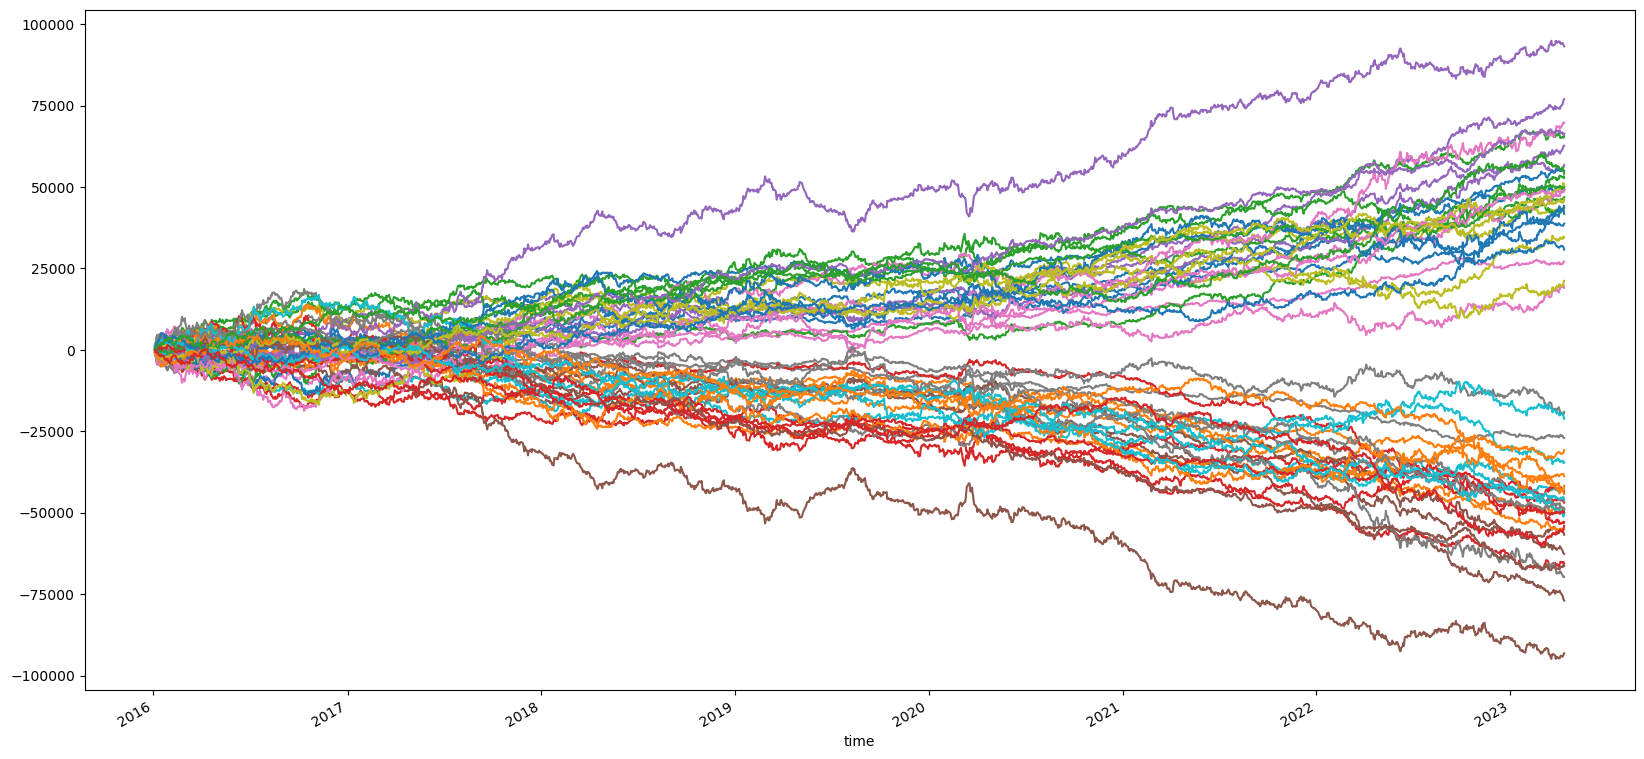

In [271]:
etf_return.cumsum().plot(legend=None,figsize=(20,10))

In [273]:
w=etf_return.std()
w=w.to_frame()
w.columns=(["STD"])
w["weigh"]=w.STD.max()
w["app"]=(w.weigh/w.STD).round(2)
w

,STD,weigh,app
AUDCAD_long,277.586729,628.747358,2.27
AUDCAD_short,277.586729,628.747358,2.27
AUDCHF_long,386.625661,628.747358,1.63
AUDCHF_short,386.625661,628.747358,1.63
AUDJPY_long,363.653760,628.747358,1.73
AUDJPY_short,363.653760,628.747358,1.73
AUDNZD_long,200.112408,628.747358,3.14
AUDNZD_short,200.112408,628.747358,3.14
AUDUSD_long,386.716558,628.747358,1.63
AUDUSD_short,386.716558,628.747358,1.63


In [274]:
newdf=pd.DataFrame()
for e in tqdm(w.index):
    x=etf_return[e]
    y=w.app[w.index==e].values[0]
    z=x*y
    z=z.to_frame()
    z.columns=([e])
    newdf = pd.concat([newdf,z],axis=1).fillna(0)

  0%|          | 0/54 [00:00<?, ?it/s]

In [275]:
newdf.tail()

,AUDCAD_long,AUDCAD_short,AUDCHF_long,AUDCHF_short,AUDJPY_long,AUDJPY_short,AUDNZD_long,AUDNZD_short,AUDUSD_long,AUDUSD_short,...,NZDCHF_long,NZDCHF_short,NZDJPY_long,NZDJPY_short,NZDUSD_long,NZDUSD_short,USDCAD_long,USDCAD_short,USDCHF_long,USDCHF_short
time,,,,,,,,,,,,,,,,,,,,,
2023-04-07,-18.478069,18.478069,-34.840404,34.840404,189.946534,-189.946534,-937.462965,937.462965,-100.151800,100.151800,...,244.025324,-244.025324,455.890777,-455.890777,207.676738,-207.676738,172.529813,-172.529813,146.008061,-146.008061
2023-04-10,-258.692968,258.692968,512.651657,-512.651657,1006.362694,-1006.362694,409.692785,-409.692785,-122.244109,122.244109,...,260.056184,-260.056184,804.972858,-804.972858,-331.366561,331.366561,-59.341464,59.341464,955.968569,-955.968569
2023-04-11,-93.930185,93.930185,-257.155362,257.155362,405.848496,-405.848496,1560.052874,-1560.052874,251.852320,-251.852320,...,-981.444915,981.444915,-394.671159,394.671159,-282.501446,282.501446,-475.830631,475.830631,-902.176126,902.176126
2023-04-12,700.626789,-700.626789,-132.725348,132.725348,326.802422,-326.802422,547.449747,-547.449747,667.187726,-667.187726,...,-356.241348,356.241348,26.050902,-26.050902,410.772372,-410.772372,-239.563690,239.563690,-1074.311945,1074.311945
2023-04-13,911.584745,-911.584745,718.375947,-718.375947,1054.734172,-1054.734172,162.803683,-162.803683,1409.489302,-1409.489302,...,691.108216,-691.108216,1086.322595,-1086.322595,1337.682521,-1337.682521,-1097.817092,1097.817092,-955.968569,955.968569


<Axes: xlabel='time'>

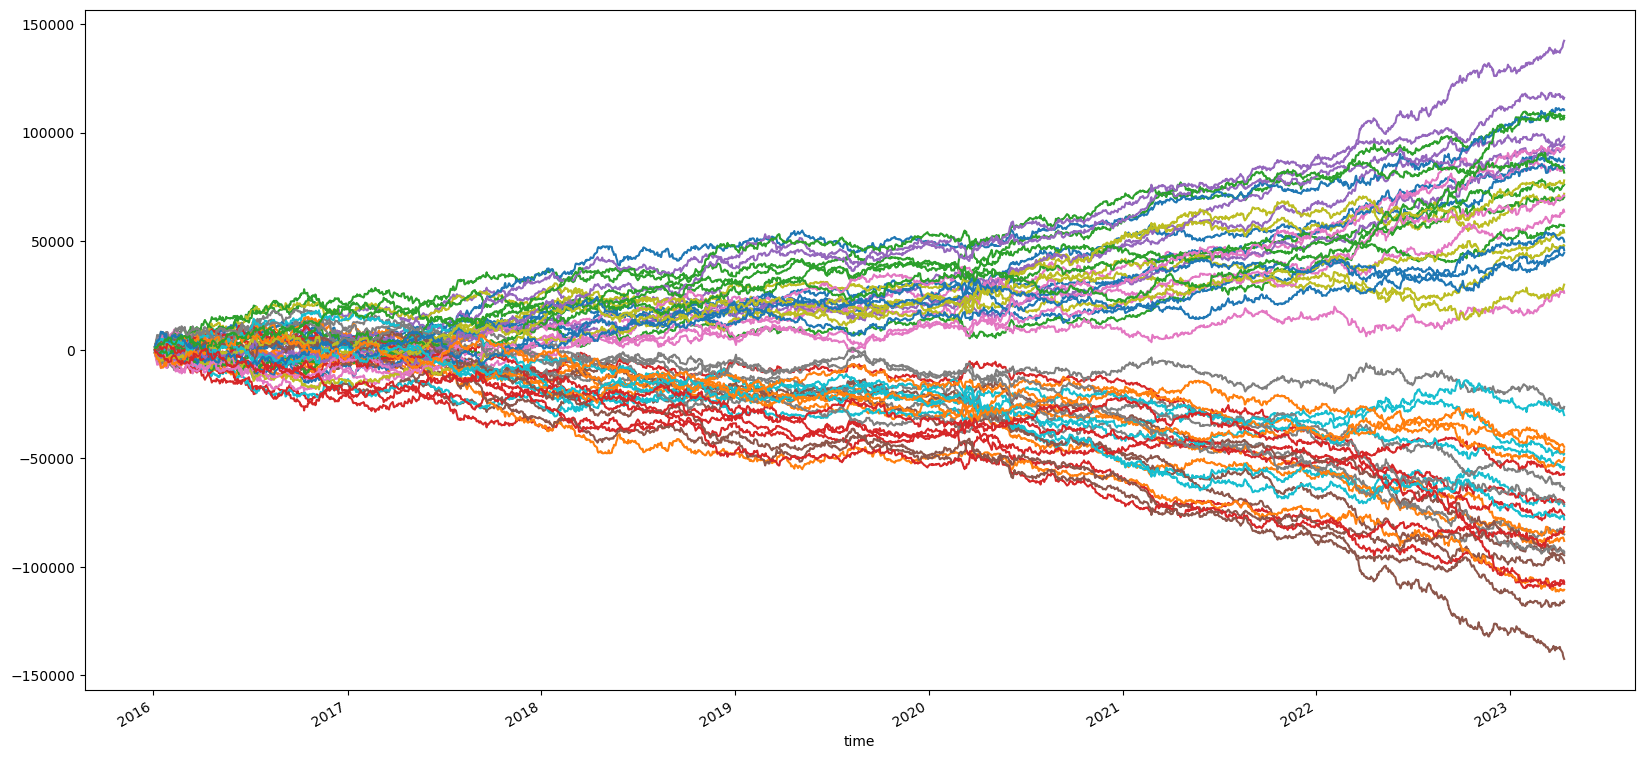

In [277]:
newdf.cumsum().plot(legend=None,figsize=(20,10))

In [278]:
np_arr = newdf.values.T
np_arr_name = newdf.columns.to_list()

In [317]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def kestner_ratio_np(operations):
   
    monthly_equity = np.cumsum(operations)
    index = np.array(np.arange(1,len(operations) + 1))
    
    x = index
    y = monthly_equity
    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    
    if std_err != 0 and len(index) > 0:
        return round(gradient / (std_err * len(index)),5)
    else:
        return np.inf
    
res=[]
results=pd.DataFrame()
for e in tqdm(range(len(np_arr))):
    for i in range(len(np_arr)):
        if np_arr_name[e].split("_")[0]!=np_arr_name[i].split("_")[0]:
            x=np_arr[e]+np_arr[i]
            kr=kestner_ratio_np(x)
            if kr != np.inf:
                avg=x[x!=0].mean()
                res.append([np_arr_name[e],np_arr_name[i],kr,avg,np.corrcoef(np_arr[e],np_arr[i])[0][1]])

results = pd.DataFrame(res)
results.columns=(["v1","v2","kr","avg_trade","corr"])
results = results.sort_values(by="kr" , ascending=False)
results.reset_index(inplace=True)
results.drop(["index"],inplace=True,axis=1)
results = results.iloc[range(0,len(results),2)]
results.reset_index(inplace=True)
results.drop(["index"],inplace=True,axis=1)
results.head(10)

  0%|          | 0/54 [00:00<?, ?it/s]

,v1,v2,kr,avg_trade,corr
0,GBPCHF_long,EURGBP_long,0.28786,87.300516,-0.734143
1,EURGBP_long,NZDCHF_long,0.18770,98.785598,-0.239626
2,NZDCAD_long,EURGBP_long,0.18550,94.269225,-0.027281
3,EURGBP_long,GBPCAD_long,0.18006,67.801446,-0.451321
4,AUDNZD_long,GBPCAD_long,0.17700,75.171537,-0.082530
5,AUDNZD_long,NZDCAD_long,0.16272,102.304575,-0.411506
6,AUDCAD_long,GBPAUD_long,0.15619,70.939763,-0.420108
7,AUDCHF_long,GBPCAD_long,0.15477,86.787550,-0.130743
8,NZDCHF_long,GBPCHF_long,0.15344,111.048217,0.446472
9,NZDCAD_long,NZDCHF_long,0.15337,118.948943,0.526324


In [333]:
correlation = 0.3

new_results = pd.DataFrame(columns=["v1","v2","kr","avg_trade","corr"])

for e in range(len(results)):
    x=results.iloc[e]
    if (x.v1.split("_")[-1] == x.v2.split("_")[-1]) & (x["corr"]<-correlation ):
        new_results = pd.concat([new_results,x.to_frame().T])
    if (x.v1.split("_")[-1] != x.v2.split("_")[-1]) & (x["corr"]>correlation ):
        new_results = pd.concat([new_results,x.to_frame().T])
new_results.head(10)        

,v1,v2,kr,avg_trade,corr
0,GBPCHF_long,EURGBP_long,0.28786,87.300516,-0.734143
3,EURGBP_long,GBPCAD_long,0.18006,67.801446,-0.451321
5,AUDNZD_long,NZDCAD_long,0.16272,102.304575,-0.411506
6,AUDCAD_long,GBPAUD_long,0.15619,70.939763,-0.420108
12,GBPUSD_long,EURGBP_long,0.15216,61.313566,-0.528334
13,EURNZD_long,NZDUSD_long,0.15035,75.056416,-0.661163
14,CADCHF_long,GBPCAD_long,0.14991,74.606785,-0.446415
15,GBPNZD_long,EURGBP_long,0.14796,66.22928,-0.407241
18,AUDUSD_long,EURAUD_long,0.142,52.116223,-0.636381
19,EURAUD_long,AUDCAD_long,0.14083,60.676072,-0.4591


In [359]:
stampa = 0
N_SPREAD = 10

today_orders = pd.DataFrame(columns=["pnl","cum","sma","newbal","sng_for_tomorrow","market_1","market_2","market_1_size","market_2_size","v_SMA"])
portfolio = pd.DataFrame()
while True:
    for i in tqdm(range(len(new_results))):

        x=newdf[new_results.iloc[:,:2].iloc[i].values]
        x=x[x!=0]
        if stampa == 1:
            x.cumsum().plot(figsize=(10,10))
            plt.show()
            x.sum(axis=1).cumsum().plot(figsize=(10,10),title="Portfolio")
            plt.legend()
            plt.show()

        ################################################################################################
        sma_ls=[]
        ks_ls=[]
        for e in tqdm(range(2,40)):
            a=x.copy().sum(axis=1).to_frame()
            a.columns=(["pnl"])
            a["cum"]=a.iloc[:,0].cumsum()
            a["sma"]=a.cum.rolling(e).mean()
            a["newbal"]=0
            a.newbal=np.where(a.cum.shift(1)<a.sma.shift(1),a.iloc[:,0],a.newbal)
            b=a.newbal
            b=b[b!=0].dropna()
            ks_ls.append(kestner_ratio(b))
            sma_ls.append(e)
        v_mean = sma_ls[ks_ls.index(max(ks_ls))]

        a=x.copy().sum(axis=1).to_frame()
        a.columns=(["pnl"])
        a["cum"]=a.iloc[:,0].cumsum()
        a["sma"]=a.cum.rolling(v_mean).mean()
        a["newbal"]=0
        a.newbal=np.where(a.cum.shift(1)<a.sma.shift(1),a.iloc[:,0],a.newbal)
        a["sng_for_tomorrow"]=0
        a["sng_for_tomorrow"]=np.where(a.cum<a.sma,1,a.sng_for_tomorrow)
        a["market_1"] = x.columns[0]
        a["market_2"] = x.columns[1]
        a["market_1_size"]=round(float(w.app[w.index==a.market_1.iloc[0]]),1)
        a["market_2_size"]=round(float(w.app[w.index==a.market_2.iloc[0]]),1)
        a["v_SMA"]=v_mean
        if stampa == 1:
            a[["pnl","newbal"]].cumsum().plot(figsize=(10,10))
        
        if a.iloc[-1:].sng_for_tomorrow[-1] == 1:
            if (a["market_1"].iloc[0] not in [*today_orders["market_1"].values, *today_orders["market_2"].values])&\
               (a["market_2"].iloc[0] not in [*today_orders["market_1"].values, *today_orders["market_2"].values]):
                    today_orders = pd.concat([today_orders,a.iloc[-1:]])
                    portfolio=pd.concat([portfolio,a.newbal],axis=1).fillna(0)
   
        if len(today_orders)>=N_SPREAD:
            print("Deviazione Standard")
            display(x.std())
            break
    if len(today_orders)>=N_SPREAD:
        break

  0%|          | 0/243 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Deviazione Standard


EURGBP_short    634.149323
GBPJPY_long     632.595179
dtype: float64

In [363]:
portfolio.corr()

,newbal,newbal,newbal,newbal,newbal,newbal,newbal,newbal,newbal,newbal
newbal,1.000000,0.151719,0.469236,0.008696,0.114543,0.474486,0.054485,-0.061807,0.000963,-0.053925
newbal,0.151719,1.000000,0.205158,-0.025696,0.759026,0.264399,0.326300,0.058400,0.101516,0.488977
newbal,0.469236,0.205158,1.000000,0.008183,0.212097,0.588400,0.055243,-0.066704,-0.051755,-0.006882
newbal,0.008696,-0.025696,0.008183,1.000000,-0.014032,0.025156,0.024035,0.404573,0.217474,-0.034598
newbal,0.114543,0.759026,0.212097,-0.014032,1.000000,0.227736,0.319825,0.022656,0.090519,0.450211
newbal,0.474486,0.264399,0.588400,0.025156,0.227736,1.000000,0.103746,-0.042080,0.037914,0.010437
newbal,0.054485,0.326300,0.055243,0.024035,0.319825,0.103746,1.000000,0.070498,-0.055791,0.472767
newbal,-0.061807,0.058400,-0.066704,0.404573,0.022656,-0.042080,0.070498,1.000000,0.481288,0.100648
newbal,0.000963,0.101516,-0.051755,0.217474,0.090519,0.037914,-0.055791,0.481288,1.000000,0.106449
newbal,-0.053925,0.488977,-0.006882,-0.034598,0.450211,0.010437,0.472767,0.100648,0.106449,1.000000


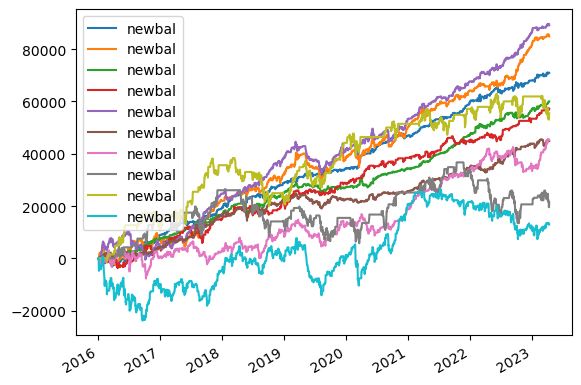

<Axes: >

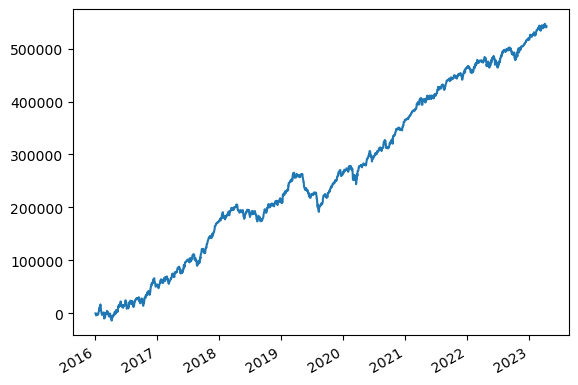

In [361]:
portfolio.cumsum().plot()
plt.show()
portfolio.sum(axis=1).cumsum().plot()

In [364]:
today_orders

,pnl,cum,sma,newbal,sng_for_tomorrow,market_1,market_2,market_1_size,market_2_size,v_SMA
2023-04-13,-115.208318,163513.865779,163546.589571,0.000000,1,GBPCHF_long,EURGBP_long,1.0,1.5,4
2023-04-13,-434.245090,140783.002464,141000.125009,-434.245090,1,CADCHF_long,GBPCAD_long,1.7,1.1,2
2023-04-13,-326.227048,133166.857239,133354.492407,0.000000,1,AUDCHF_long,EURAUD_long,1.6,1.4,3
2023-04-13,239.865430,127902.928511,128034.935819,239.865430,1,NZDUSD_long,USDCAD_long,1.7,1.6,6
2023-04-13,-530.346727,170256.840602,170522.013966,-530.346727,1,GBPNZD_long,NZDCHF_long,1.1,1.8,2
2023-04-13,-241.298192,111717.217367,111837.866463,-241.298192,1,USDCHF_long,EURUSD_long,1.5,1.4,2
2023-04-13,-213.184402,139467.981908,139574.574109,-213.184402,1,GBPAUD_long,NZDJPY_long,1.1,1.9,2
2023-04-13,1802.439253,44175.224490,47012.407879,1802.439253,1,EURNZD_short,NZDCAD_long,1.3,2.2,39
2023-04-13,1956.187740,61760.722545,64626.019223,1956.187740,1,AUDCAD_long,EURAUD_short,2.3,1.4,39
2023-04-13,-447.140850,718.380211,1127.098559,-447.140850,1,EURGBP_short,GBPJPY_long,1.5,1.0,3
